In [7]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

In [8]:
from pmdarima import auto_arima

## Data Preparation for ARIMA models

In [17]:
pred_var = 'Additional_Doses_Vax_Pct'
 
df = pd.read_csv('df_post_eda.csv') 

df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date')[pred_var].mean()

#subset data to be only dates and predictin variable values
data = pd.DataFrame(df)

# resambpling to weekly datetime to prevent convergence warnings
data = data.resample('W').sum()

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
data = pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns, index=df.index)

In [18]:
data.head()

,Additional_Doses_Vax_Pct
Date,
2021-11-03,0.000000
2021-11-10,0.070026
2021-11-17,0.135949
2021-11-24,0.204748
2021-12-01,0.254180


## AUTOARIMA MODEL

In [19]:
# Split data into test and train

split_date = int(len(data) * 0.8)
data = data.sort_index(ascending=True)

# Split the data
train_data = data.iloc[:split_date]
test_data = data.iloc[split_date:]

AUTOARIMA model tunnig findings: seasonal did not change anything 

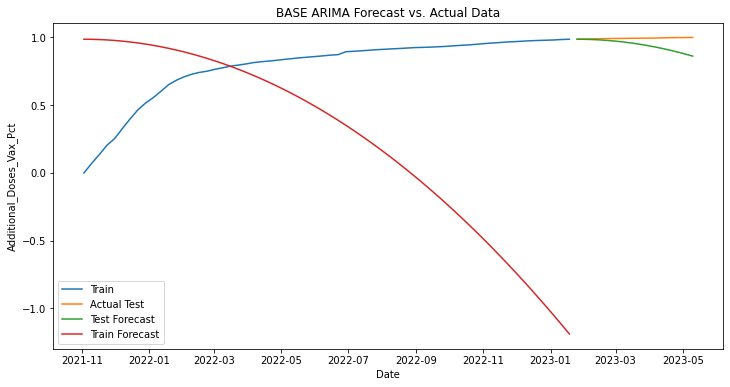

RMSE on train data: 0.994681260156941
RMSE on test data: 0.06646521684049636


In [12]:
# base model
# Fit Auto ARIMA model on the training set
model = auto_arima(train_data['Additional_Doses_Vax_Pct'])
model.fit(train_data['Additional_Doses_Vax_Pct'])

# Forecast future values on the test set
future_forecast = model.predict(n_periods=len(test_data), alpha=0.05)
train_forecats = model.predict(n_periods=len(train_data), alpha=0.05)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Additional_Doses_Vax_Pct'], label='Train')
plt.plot(test_data.index, test_data['Additional_Doses_Vax_Pct'], label='Actual Test')
plt.plot(test_data.index, future_forecast, label='Test Forecast')
plt.plot(train_data.index, train_forecats, label='Train Forecast')
#plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Additional_Doses_Vax_Pct')
plt.title('BASE ARIMA Forecast vs. Actual Data')
plt.legend()
plt.show()

# Calculate RMSE on the test set
rmse_t = sqrt(mean_squared_error(train_data['Additional_Doses_Vax_Pct'], train_forecats))
print(f'RMSE on train data: {rmse_t}')
rmse = sqrt(mean_squared_error(test_data['Additional_Doses_Vax_Pct'], future_forecast))
print(f'RMSE on test data: {rmse}')


The auto_arima function in the pmdarima library has several parameters that you can use to customize the behavior of the auto ARIMA model. Here is a list of some key parameters:

y (array-like): The time-series data to which to fit the ARIMA model.
exogenous (array-like or pd.DataFrame, optional): Exogenous variables to include in the model. This can be a DataFrame or an array-like object.

start_p (int, optional): The starting value of the p parameter (order of the AR component).

d (int or None, optional): The order of differencing. If set to None, it will automatically be determined.

start_q (int, optional): The starting value of the q parameter (order of the MA component).

max_p (int, optional): The maximum value of the p parameter to search.

max_d (int or None, optional): The maximum value of the d parameter to search.

max_q (int, optional): The maximum value of the q parameter to search.

start_P (int, optional): The starting value of the P parameter for seasonal components.

D (int or None, optional): The order of seasonal differencing. If set to None, it will automatically be determined.

start_Q (int, optional): The starting value of the Q parameter for seasonal components.

max_P (int, optional): The maximum value of the P parameter for seasonal components.

max_D (int or None, optional): The maximum value of the D parameter for seasonal components.

max_Q (int, optional): The maximum value of the Q parameter for seasonal components.

seasonal (bool, optional): Whether to include seasonal components.

m (int, optional): The number of periods in a season. This parameter is required if seasonal=True.

stepwise (bool, optional): Whether to use the stepwise algorithm to search for the best model.

n_jobs (int, optional): The number of parallel jobs to run. Set to -1 to use all available CPUs.

information_criterion (str, optional): The information criterion to minimize. Options include 'aic', 'aicc', 'bic', and 'hqic'.

alpha (float, optional): The significance level for the stepwise algorithm. The default is 0.05.

test (str, optional): The statistical test to use for the stepwise algorithm. Options include 'kpss' and 'adf'.

seasonal_test (str, optional): The statistical test to use for determining seasonality. Options include 'ocsb', 'ch', 'adf', and 'heinrich'.

stepwise (bool, optional): Whether to use the stepwise algorithm to search for the best model.

trace (bool or int, optional): Whether to print debugging information during the search. If trace is an integer, it controls the level of debugging information.

suppress_warnings (bool, optional): Whether to suppress warnings during the search.

error_action ('warn', 'raise', 'ignore'), optional): What to do if an exception occurs during fitting. Options include 'warn', 'raise', and 'ignore'.

trace (int or bool, optional): Whether to print debugging information during the search. If trace is an integer, it controls the level of debugging information.

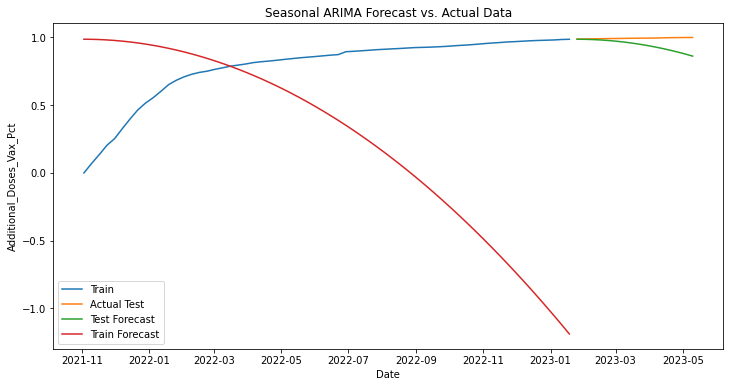

RMSE on train data: 0.994681260156941
RMSE on test data: 0.06646521684049636


In [13]:
# with seasonal
# Fit Auto ARIMA model on the training set
model = auto_arima(train_data['Additional_Doses_Vax_Pct'], seasonal = True)
model.fit(train_data['Additional_Doses_Vax_Pct'])

# Forecast future values on the test set
future_forecast = model.predict(n_periods=len(test_data), alpha=0.05)
train_forecats = model.predict(n_periods=len(train_data), alpha=0.05)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Additional_Doses_Vax_Pct'], label='Train')
plt.plot(test_data.index, test_data['Additional_Doses_Vax_Pct'], label='Actual Test')
plt.plot(test_data.index, future_forecast, label='Test Forecast')
plt.plot(train_data.index, train_forecats, label='Train Forecast')
#plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Additional_Doses_Vax_Pct')
plt.title('Seasonal ARIMA Forecast vs. Actual Data')
plt.legend()
plt.show()

# Calculate RMSE on the test set
rmse_t = sqrt(mean_squared_error(train_data['Additional_Doses_Vax_Pct'], train_forecats))
print(f'RMSE on train data: {rmse_t}')
rmse = sqrt(mean_squared_error(test_data['Additional_Doses_Vax_Pct'], future_forecast))
print(f'RMSE on test data: {rmse}')

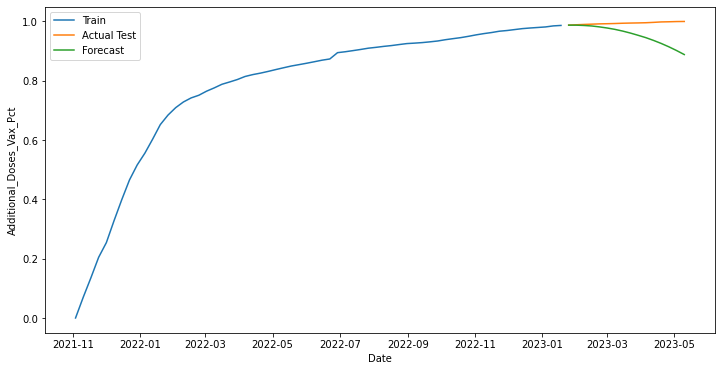

RMSE on test data: 0.05298804037490908


In [39]:
# base model
# Fit Auto ARIMA model on the training set
model = auto_arima(train_data['Additional_Doses_Vax_Pct'], m =12)
model.fit(train_data['Additional_Doses_Vax_Pct'])

# Forecast future values on the test set
future_forecast = model.predict(n_periods=len(test_data), alpha=0.05)
train_forecats = model.predict(n_periods=len(train_data), alpha=0.05)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Additional_Doses_Vax_Pct'], label='Train')
plt.plot(test_data.index, test_data['Additional_Doses_Vax_Pct'], label='Actual Test')
plt.plot(test_data.index, future_forecast, label='Test Forecast')
plt.plot(train_data.index, train_forecats, label='Train Forecast')
#plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Additional_Doses_Vax_Pct')
plt.title(' ARIMA Forecast vs. Actual Data')
plt.legend()
plt.show()

# Calculate RMSE on the test set
rmse_t = sqrt(mean_squared_error(train_data['Additional_Doses_Vax_Pct'], train_forecats))
print(f'RMSE on train data: {rmse_t}')
rmse = sqrt(mean_squared_error(test_data['Additional_Doses_Vax_Pct'], future_forecast))
print(f'RMSE on test data: {rmse}')

In [ ]:
## tunning AUTO ARIMA

In [14]:
# Create lag variables and merge them with the original DataFrame
for i in range(1, 4):  # You can adjust the number of lags
    data[f'lag_{i}'] = data['Additional_Doses_Vax_Pct'].shift(i)

# Drop NaN values resulting from the lag operation
data = data.dropna()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Define exogenous variables (lag variables)
exogenous_cols = [col for col in data.columns if col.startswith('lag_')]
exogenous_train = train_data[exogenous_cols]
exogenous_test = test_data[exogenous_cols]

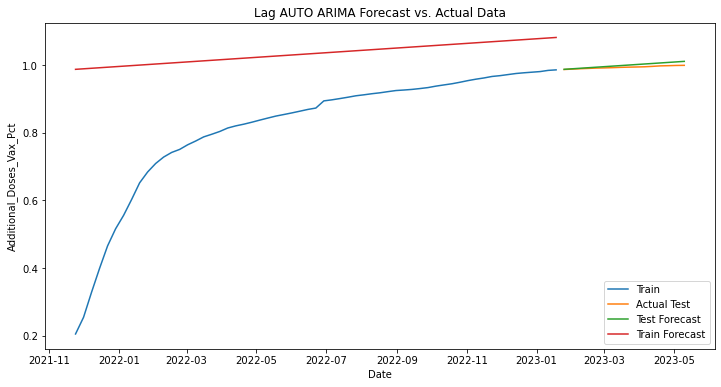

RMSE on train data: 0.26879196192039506
RMSE on test data: 0.0067169224987920695


In [16]:
# Fit Auto ARIMA model with exogenous variables
model = auto_arima(train_data['Additional_Doses_Vax_Pct'], exogenous=exogenous_train, m=12)
model.fit(train_data['Additional_Doses_Vax_Pct'], exogenous=exogenous_train)

# Forecast future values on the test set
future_forecast, conf_int = model.predict(n_periods=len(test_data), exogenous=exogenous_test, return_conf_int=True)

# Forecast future values on the test set
# future_forecast = model.predict(n_periods=len(test_data), alpha=0.05)
train_forecats = model.predict(n_periods=len(train_data), alpha=0.05)
train_forecats, conf_int = model.predict(n_periods=len(train_data), exogenous=exogenous_train, return_conf_int=True)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Additional_Doses_Vax_Pct'], label='Train')
plt.plot(test_data.index, test_data['Additional_Doses_Vax_Pct'], label='Actual Test')
plt.plot(test_data.index, future_forecast, label='Test Forecast')
plt.plot(train_data.index, train_forecats, label='Train Forecast')
#plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Additional_Doses_Vax_Pct')
plt.title('Lag AUTO ARIMA Forecast vs. Actual Data')
plt.legend()
plt.show()

# Calculate RMSE on the test set
rmse_t = sqrt(mean_squared_error(train_data['Additional_Doses_Vax_Pct'], train_forecats))
print(f'RMSE on train data: {rmse_t}')
rmse = sqrt(mean_squared_error(test_data['Additional_Doses_Vax_Pct'], future_forecast))
print(f'RMSE on test data: {rmse}')

In [ ]:
# sarimax hyperparam tunning

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from itertools import product
from tqdm import tqdm


In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from itertools import product
from tqdm import tqdm

# Create lag variables and merge them with the original DataFrame
for i in range(1, 4):  # You can adjust the number of lags
    data[f'lag_{i}'] = data['Additional_Doses_Vax_Pct'].shift(i)

# Drop NaN values resulting from the lag operation
data = data.dropna()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Define exogenous variables (lag variables)
exogenous_cols = [col for col in data.columns if col.startswith('lag_')]
exogenous_train = train_data[exogenous_cols]
exogenous_test = test_data[exogenous_cols]

In [73]:
data.head()

,Additional_Doses_Vax_Pct,lag_1,lag_2,lag_3
Date,,,,
2021-11-24,0.204748,0.135949,0.070026,0.000000
2021-12-01,0.254180,0.204748,0.135949,0.070026
2021-12-08,0.328348,0.254180,0.204748,0.135949
2021-12-15,0.399026,0.328348,0.254180,0.204748
2021-12-22,0.465486,0.399026,0.328348,0.254180


In [71]:
# Grid search for parameter tuning
p_values = [0, 1]  
d_values = [0, 1]  
q_values = [0, 1]  
P_values = [0, 1]  
D_values = [0, 1]  
Q_values = [0, 1]  
seasonal_periods = [12] 

best_rmse = float('inf')
best_params = None

# Iterate through parameter combinations
for p, d, q, P, D, Q, seasonal_period in tqdm(product(p_values, d_values, q_values, P_values, D_values, Q_values, seasonal_periods), total=len(p_values)*len(d_values)*len(q_values)*len(P_values)*len(D_values)*len(Q_values)*len(seasonal_periods)):
    # Fit SARIMAX model
    model = SARIMAX(train_data['Additional_Doses_Vax_Pct'], order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period), exog=exogenous_train)
    result = model.fit(disp=False)

    # Forecast future values on the test set
    forecast = result.get_forecast(steps=len(test_data), exog=exogenous_test)
    forecast_mean = forecast.predicted_mean

    # Calculate RMSE on the test set
    rmse = sqrt(mean_squared_error(test_data['Additional_Doses_Vax_Pct'], forecast_mean))

    # Update best parameters if the current model has a lower RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = {'p': p, 'd': d, 'q': q, 'P': P, 'D': D, 'Q': Q, 'seasonal_period': seasonal_period}

print(f'Best parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')


  0%|                                                    | 0/64 [00:00<?, ?it/s]/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, fr

 22%|█████████▍                                 | 14/64 [00:02<00:10,  4.77it/s]/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 23%|██████████                                 | 15/64 [00:02<00:13,  3.57it/s]/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency 

/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 41%|█████████████████▍                         | 26/64 [00:04<00:06,  6.06it/s]/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init

 61%|██████████████████████████▏                | 39/64 [00:07<00:04,  5.19it/s]/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 62%|██████████████████████████▉                | 40/64 [00:07<00:05,  4.46it/s]/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency 

/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 80%|██████████████████████████████████▎        | 51/64 [00:10<00:02,  5.14it/s]/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  war

/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 97%|█████████████████████████████████████████▋ | 62/64 [00:13<00:00,  4.08it/s]/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
 98%|██████████████████████████████████████████▎| 63/64 [00:13<00:00,  4.86it/s]/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency 

Best parameters: {'p': 1, 'd': 0, 'q': 1, 'P': 0, 'D': 0, 'Q': 0, 'seasonal_period': 12}
Best RMSE: 0.0003554422201422536


In [ ]:
## auto arima overfitts when fitting hyper params, small dataset 

In [72]:
best_params

{'p': 1, 'd': 0, 'q': 1, 'P': 0, 'D': 0, 'Q': 0, 'seasonal_period': 12}

In [20]:
# Create lag variables and merge them with the original DataFrame
for i in range(1, 4):  # You can adjust the number of lags
    data[f'lag_{i}'] = data['Additional_Doses_Vax_Pct'].shift(i)

# Drop NaN values resulting from the lag operation
data = data.dropna()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Define exogenous variables (lag variables)
exogenous_cols = [col for col in data.columns if col.startswith('lag_')]
exogenous_train = train_data[exogenous_cols]
exogenous_test = test_data[exogenous_cols]


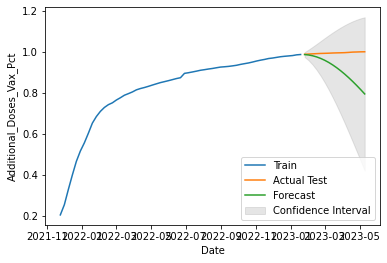

RMSE on test data: 0.10299055986547166


In [66]:
# Use the best_params obtained from grid search
best_params = {'p': 1, 'd': 0, 'q': 1, 'P': 0, 'D': 0, 'Q': 0, 'seasonal_period': 12}

# Fit Auto ARIMA model with best_params
model = auto_arima(train_data['Additional_Doses_Vax_Pct'], exogenous=exogenous_train, seasonal=True, m=best_params['seasonal_period'],
                   start_p=best_params['p'], d=best_params['d'], start_q=best_params['q'],
                   start_P=best_params['P'], D=best_params['D'], start_Q=best_params['Q'])
model.fit(train_data['Additional_Doses_Vax_Pct'], exogenous=exogenous_train)

# Forecast future values on the test set
future_forecast, conf_int = model.predict(n_periods=len(test_data), exogenous=exogenous_test, return_conf_int=True)

# Plotting the results
plt.plot(train_data.index, train_data['Additional_Doses_Vax_Pct'], label='Train')
plt.plot(test_data.index, test_data['Additional_Doses_Vax_Pct'], label='Actual Test')
plt.plot(test_data.index, future_forecast, label='Forecast')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Additional_Doses_Vax_Pct')
plt.legend()
plt.show()

# Calculate RMSE on the test set
rmse = sqrt(mean_squared_error(test_data['Additional_Doses_Vax_Pct'], future_forecast))
print(f'RMSE on test data: {rmse}')


In [24]:
import warnings

# Suppress specific warning types
warnings.filterwarnings("ignore")

RMSE on train data: 0.0059290647238196695
RMSE on test data: 0.0003554422201422536


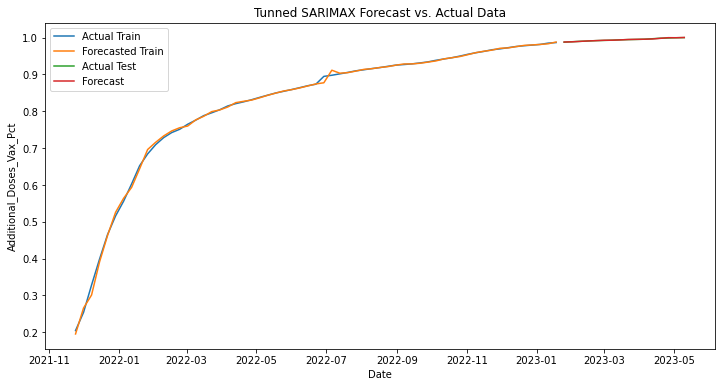

In [25]:
# Use the best_params obtained from grid search

best_params = {'p': 1, 'd': 0, 'q': 1, 'P': 0, 'D': 0, 'Q': 0, 'seasonal_period': 12}

# Fit SARIMA model with best_params
order = (best_params['p'], best_params['d'], best_params['q'])
seasonal_order = (best_params['P'], best_params['D'], best_params['Q'], best_params['seasonal_period'])
model = SARIMAX(train_data['Additional_Doses_Vax_Pct'], exog=exogenous_train, order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

# Forecast future values on the test set
forecast = result.get_forecast(steps=len(test_data), exog=exogenous_test)
forecast_mean = forecast.predicted_mean

# Forecast future values on the training set
train_forecast = result.get_forecast(steps=len(train_data), exog=exogenous_train)
train_forecast_mean = train_forecast.predicted_mean

# Calculate RMSE on the training set
train_rmse = sqrt(mean_squared_error(train_data['Additional_Doses_Vax_Pct'], train_forecast_mean))
print(f'RMSE on train data: {train_rmse}')
rmse = sqrt(mean_squared_error(test_data['Additional_Doses_Vax_Pct'], forecast_mean))
print(f'RMSE on test data: {rmse}')
# Plotting the results
plt.figure(figsize=(12, 6))
#plt.plot(train_data.index, train_data['Additional_Doses_Vax_Pct'], label='Train')
plt.plot(train_data.index, train_data['Additional_Doses_Vax_Pct'], label='Actual Train')
plt.plot(train_data.index, train_forecast_mean, label='Forecasted Train')
plt.plot(test_data.index, test_data['Additional_Doses_Vax_Pct'], label='Actual Test')
plt.plot(test_data.index, forecast_mean, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Additional_Doses_Vax_Pct')
plt.title('Tunned SARIMAX Forecast vs. Actual Data')
plt.legend()
plt.show()
